In [10]:
import pandas as pd
import matplotlib.pyplot as plt

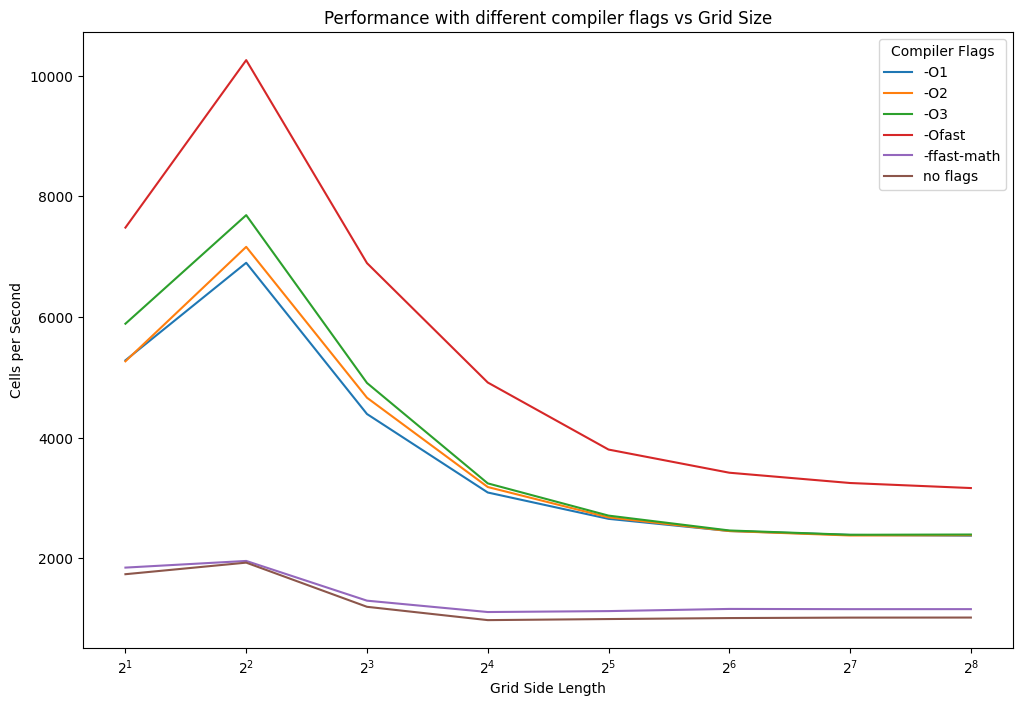

In [21]:
files = ["noflags.csv", "ffast-math.csv", "O1.csv", "O2.csv", "O3.csv", "Ofast.csv"]
flags = ["no flags", "-ffast-math", "-O1", "-O2", "-O3", "-Ofast"]

data = pd.DataFrame(columns=[ "Compiler Flags", "N", "ns per cell total", "react", "vel_step", "dens_step" ])

for i, path in enumerate(files):
  p = pd.read_csv(path)
  p["Compiler Flags"] = flags[i]
  data = pd.concat([data, p], ignore_index=True)

data = data.groupby(["Compiler Flags", "N"]).mean()["ns per cell total"].apply(lambda x: 1000000/x).rename("cells per second")

data.unstack("Compiler Flags").plot(xlabel="Grid Side Length", ylabel="Cells per Second", figsize=(12, 8), title="Performance with different compiler flags vs Grid Size").set_xscale("log", base=2)

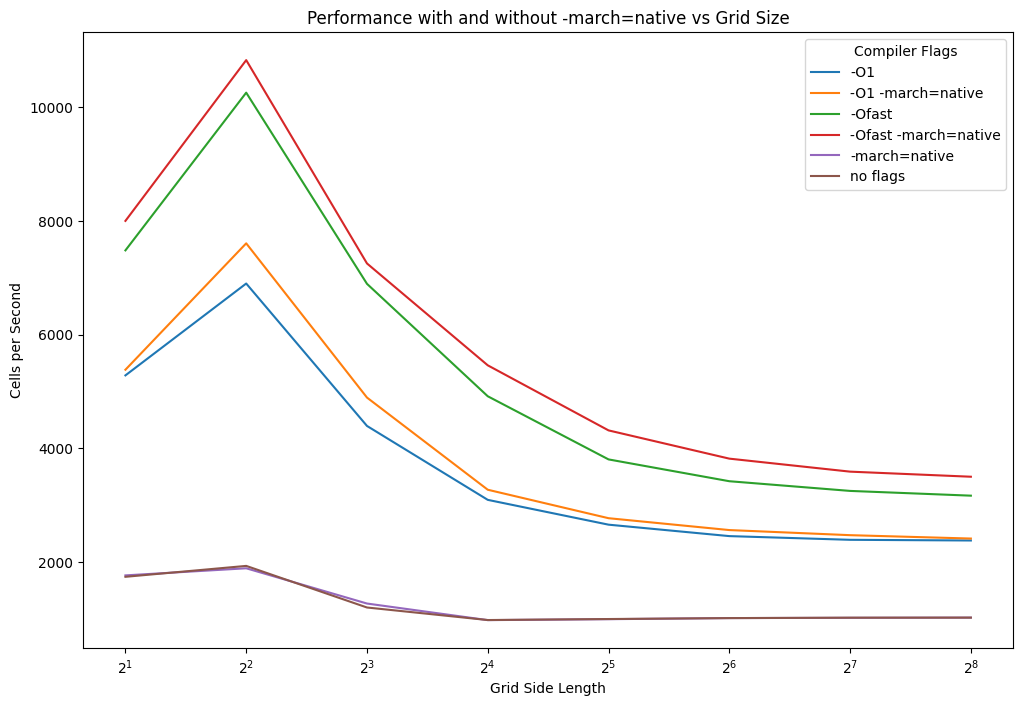

In [22]:
files = ["noflags.csv", "march-native.csv", "O1.csv", "O1-march-native.csv", "Ofast.csv", "Ofast-march-native.csv"]
flags = ["no flags", "-march=native", "-O1", "-O1 -march=native", "-Ofast", "-Ofast -march=native"]

data = pd.DataFrame(columns=[ "Compiler Flags", "N", "ns per cell total", "react", "vel_step", "dens_step" ])

for i, path in enumerate(files):
  p = pd.read_csv(path)
  p["Compiler Flags"] = flags[i]
  data = pd.concat([data, p], ignore_index=True)

data = data.groupby(["Compiler Flags", "N"]).mean()["ns per cell total"].apply(lambda x: 1000000/x).rename("cells per second")

data.unstack("Compiler Flags").plot(xlabel="Grid Side Length", ylabel="Cells per Second", figsize=(12, 8), title="Performance with and without -march=native vs Grid Size").set_xscale("log", base=2)

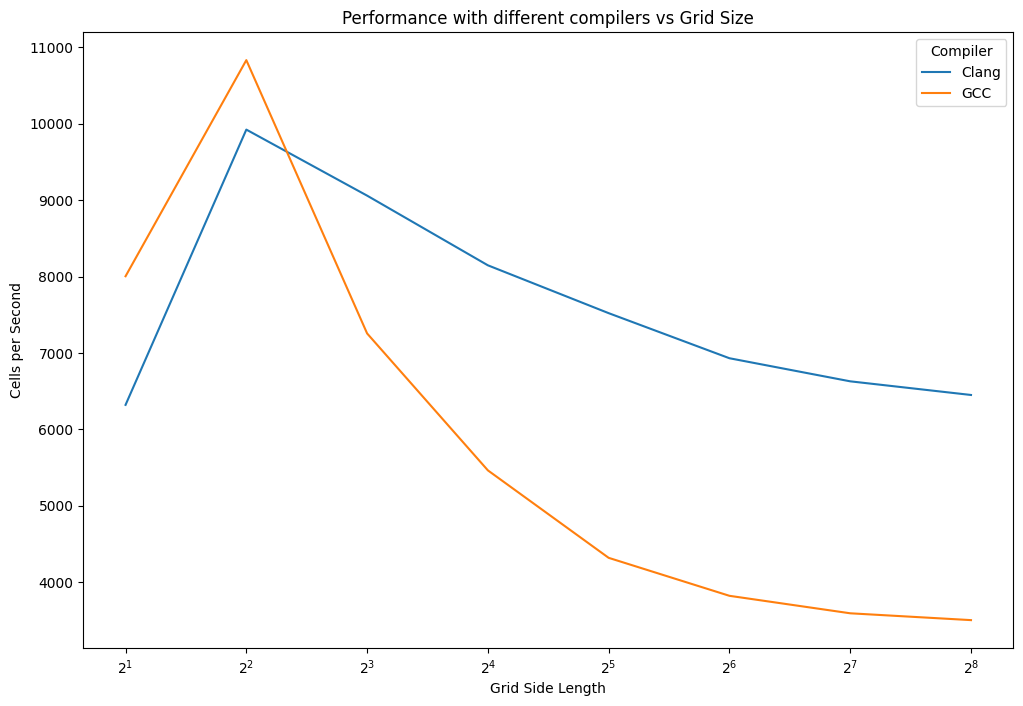

In [23]:
files = ["Ofast-march-native.csv", "clang-Ofast-march-native.csv"]
compiler = ["GCC", "Clang"]

data = pd.DataFrame(columns=[ "Compiler", "N", "ns per cell total", "react", "vel_step", "dens_step" ])

for i, path in enumerate(files):
  p = pd.read_csv(path)
  p["Compiler"] = compiler[i]
  data = pd.concat([data, p], ignore_index=True)

data = data.groupby(["Compiler", "N"]).mean()["ns per cell total"].apply(lambda x: 1000000/x).rename("cells per second")

data.unstack("Compiler").plot(xlabel="Grid Side Length", ylabel="Cells per Second", figsize=(12, 8), title="Performance with different compilers vs Grid Size").set_xscale("log", base=2)

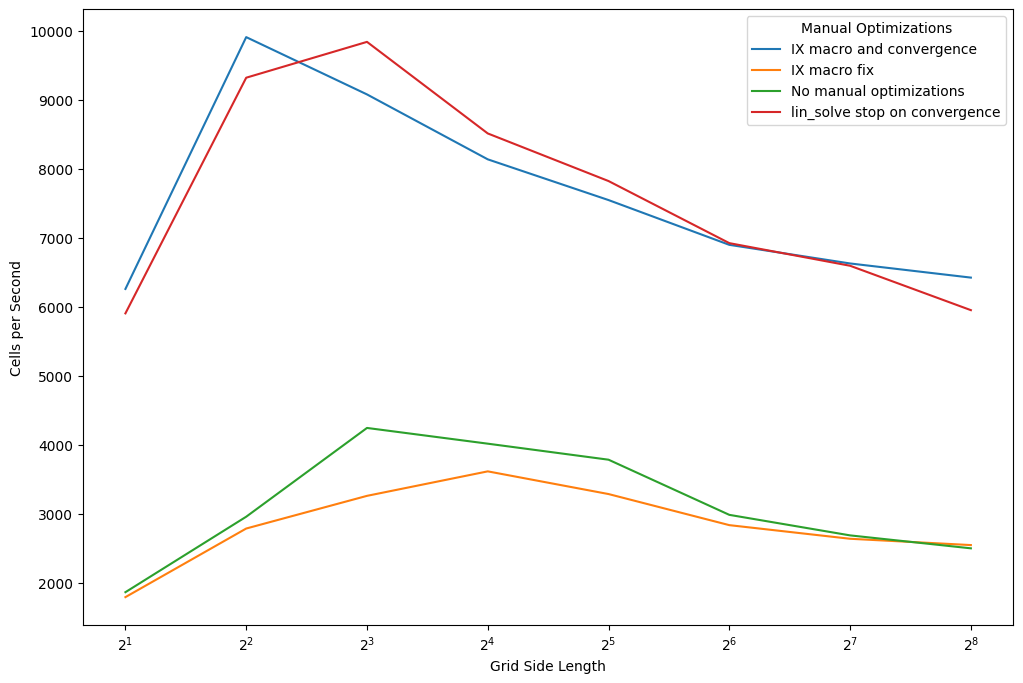

In [14]:
files = ["clang-Ofast-march-native-bad.csv", "clang-Ofast-march-native-IX.csv",  "clang-Ofast-march-native-convergence.csv", "clang-Ofast-march-native-IX-convergence.csv"]
opts = ["No manual optimizations", "IX macro fix", "lin_solve stop on convergence", "IX macro and convergence"]

data = pd.DataFrame(columns=[ "Manual Optimizations", "N", "ns per cell total", "react", "vel_step", "dens_step" ])

for i, path in enumerate(files):
  p = pd.read_csv(path)
  p["Manual Optimizations"] = opts[i]
  data = pd.concat([data, p], ignore_index=True)

data = data.groupby(["Manual Optimizations", "N"]).mean()["ns per cell total"].apply(lambda x: 1000000/x).rename("cells per second")

data.unstack("Manual Optimizations").plot(xlabel="Grid Side Length", ylabel="Cells per Second", figsize=(12, 8)).set_xscale("log", base=2)

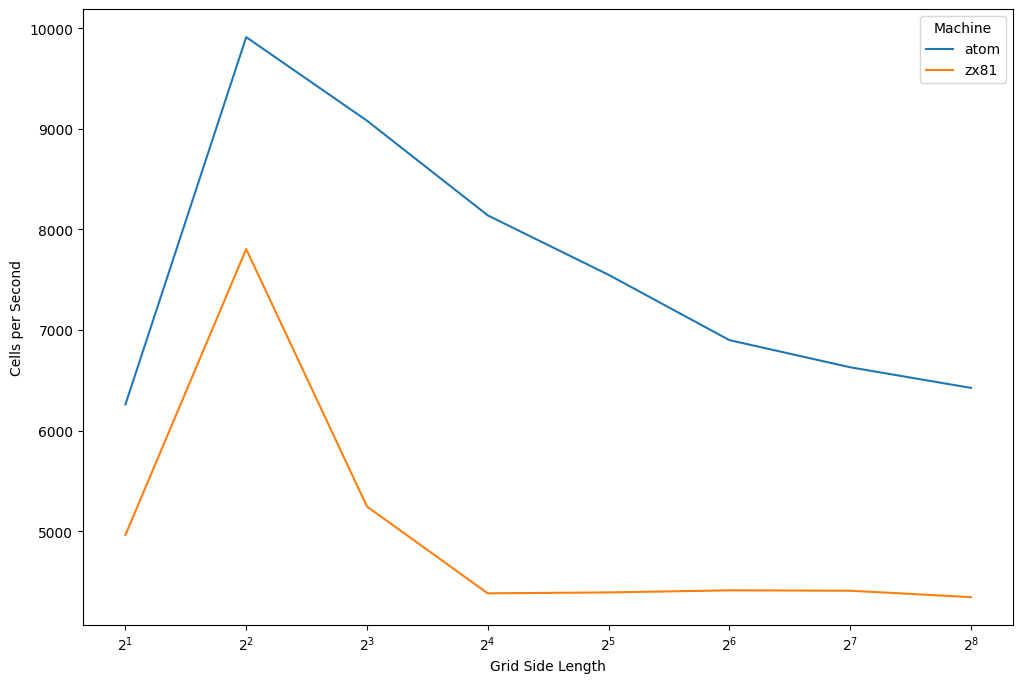

In [15]:
files = ["clang-Ofast-march-native-IX-convergence.csv","zx81-clang-Ofast-march-native-IX-convergence.csv"]
machines = ["atom", "zx81"]

data = pd.DataFrame(columns=[ "Machine", "N", "ns per cell total", "react", "vel_step", "dens_step" ])

for i, path in enumerate(files):
  p = pd.read_csv(path)
  p["Machine"] = machines[i]
  data = pd.concat([data, p], ignore_index=True)

data = data.groupby(["Machine", "N"]).mean()["ns per cell total"].apply(lambda x: 1000000/x).rename("cells per second")

data.unstack("Machine").plot(xlabel="Grid Side Length", ylabel="Cells per Second", figsize=(12, 8)).set_xscale("log", base=2)